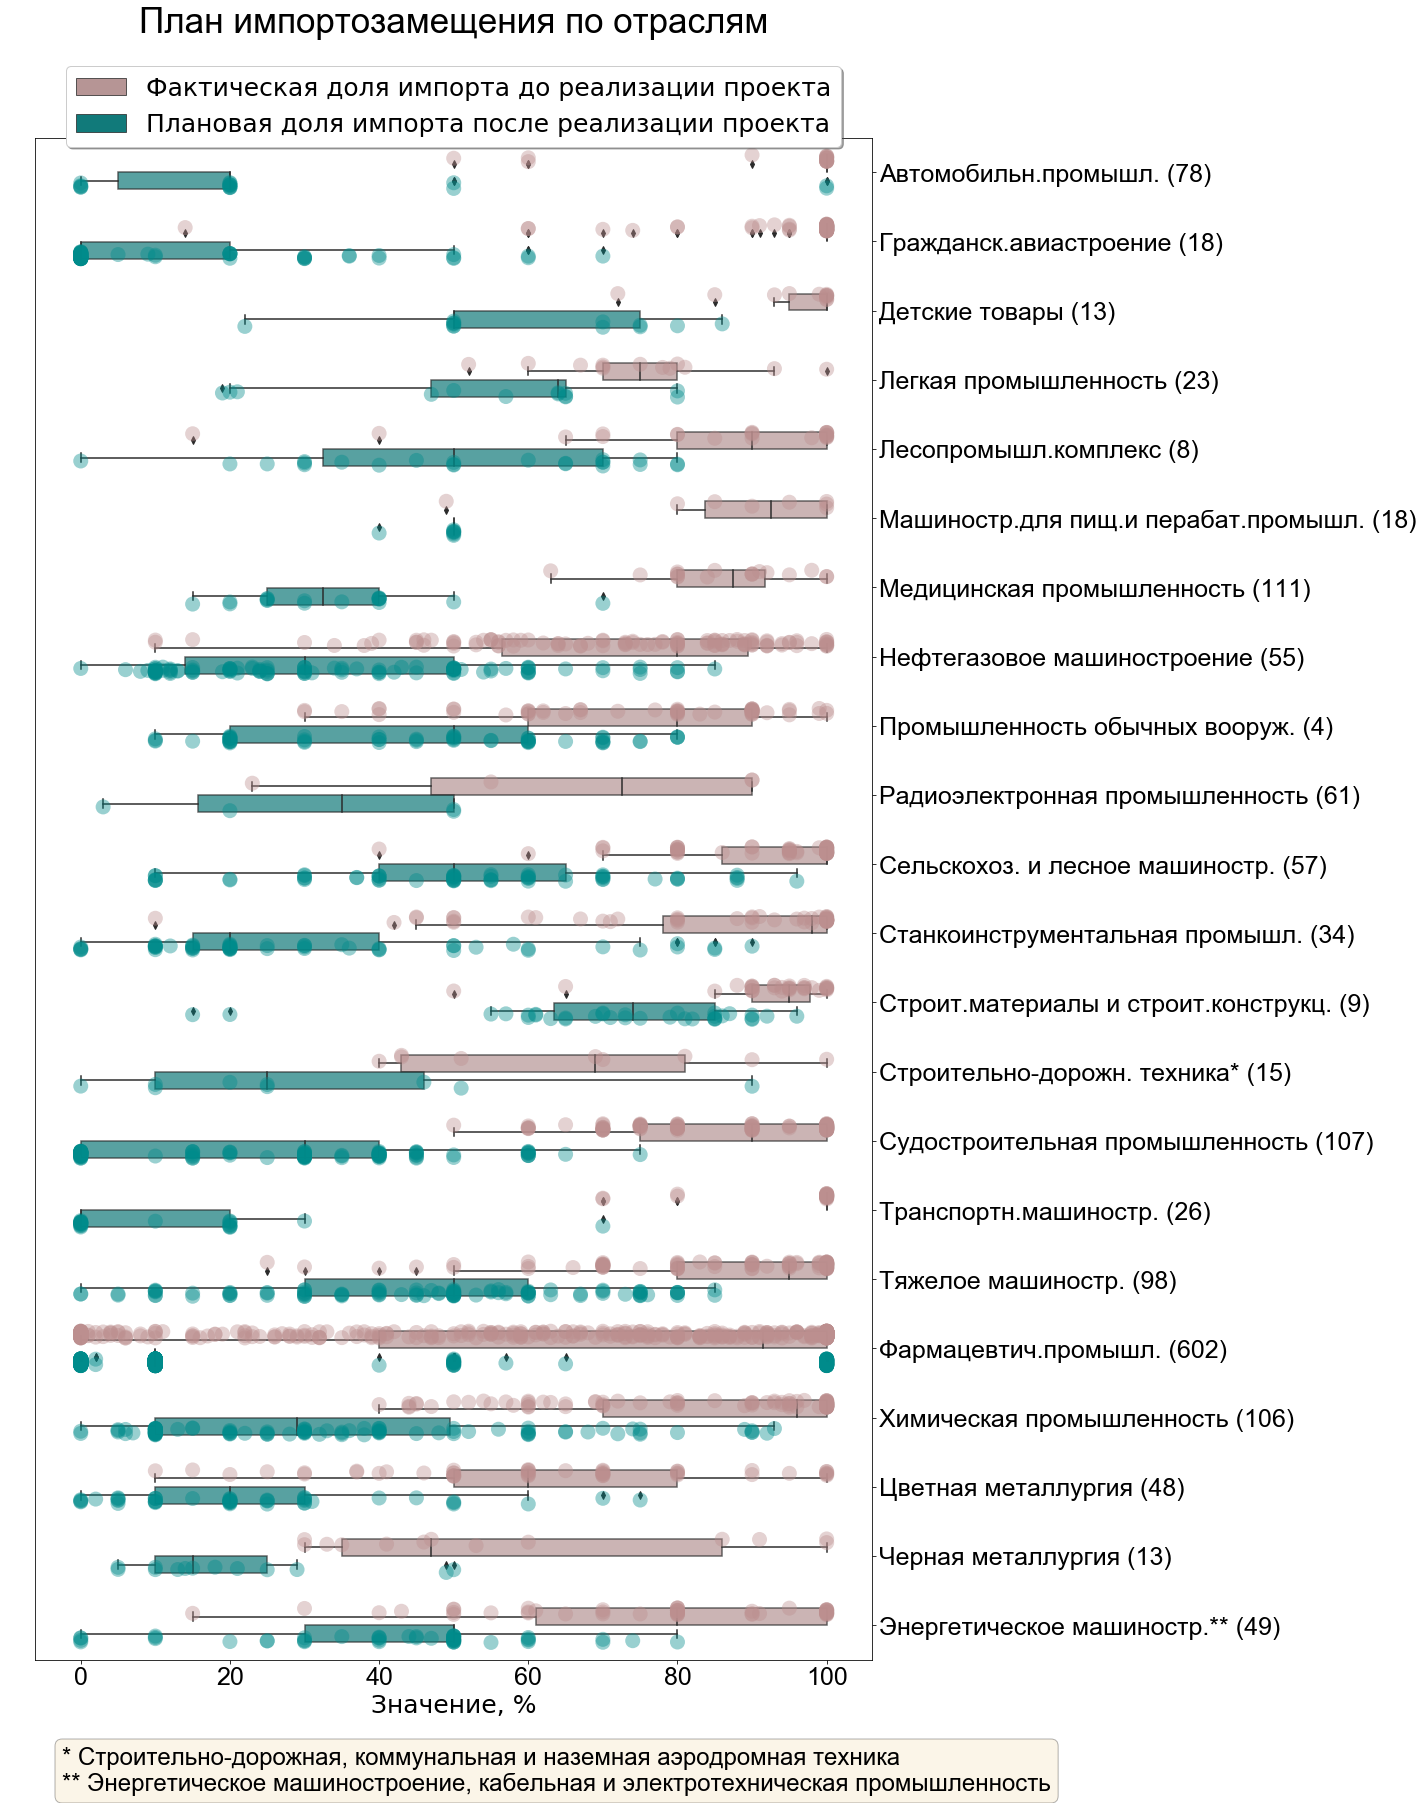

In [218]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
 
    
header=['branch', 'name', 'year', 'import_before', 'import_after']
table = pd.read_csv('!tables_all_for_statistics.csv',encoding='cp1251', engine='python', delimiter='|', index_col=False, names=header)
#table['import_before'] = table.import_before.apply(lambda x: x.replace('%',''))
table['import_before'].replace(to_replace='%', value='',inplace=True,regex=True)
table['import_after'].replace(to_replace='%', value='',inplace=True,regex=True)
table["import_before"] = table.import_before.astype(float)
table["import_after"] = table.import_after.astype(float)

dd=pd.melt(table,id_vars=['branch'],value_vars=['import_before','import_after'],var_name='_Import')

counted_branches_series=Add_counted_branches_column(table)

fig=plt.figure(figsize=(15,28))

# make grouped boxplot
#custom_palette = sns.diverging_palette(15, 215, sep=30, n=2)
custom_palette=['rosybrown', 'darkcyan']

ax=sns.boxplot(y='branch', x='value',
               data=dd, boxprops=dict(alpha=.7), 
               #palette="Set2",
               palette=custom_palette,
               
               width=0.5, 
               hue='_Import')
# make grouped stripplot
ax=sns.stripplot(y='branch', x='value', 
                   data=dd, 
                 
                   jitter=True,
                   dodge=True, 
                   marker='o', size=15, 
                   alpha=0.4, 
                   #palette="Set2",
                   palette=custom_palette,
                   hue='_Import'
                   )


ax.yaxis.tick_right()
ax.set_yticklabels(counted_branches_series)
# specify just one legend
ax.yaxis.set_tick_params(labelsize=25)
ax.xaxis.set_tick_params(labelsize=25)

plt.xlabel(u'Значение, %', fontsize=25)
plt.ylabel(u' ', fontsize=25)
plt.title(u'План импортозамещения по отраслям', fontsize=35, fontname='Arial', y=1.065)

props = dict(boxstyle='round', facecolor='wheat', alpha=0.3)
ax.text(0.15, 0.06, u'* Строительно-дорожная, коммунальная и наземная аэродромная техника\n** Энергетическое машиностроение, кабельная и электротехническая промышленность', 
        fontsize=24, fontname='Arial', transform=plt.gcf().transFigure, bbox=props)

# get legend information from the plot object
handles, labels = ax.get_legend_handles_labels()
L=plt.legend(handles[0:2], labels[0:2], loc='upper center', bbox_to_anchor=(0.5, 1.055), fontsize='25',
         fancybox=True, shadow=True)
L.get_texts()[0].set_text(u'Фактическая доля импорта до реализации проекта')
L.get_texts()[1].set_text(u'Плановая доля импорта после реализации проекта')

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
#plt.subplots_adjust(hspace = 10)
plt.savefig('importsubstitution.png', dpi=150, bbox_inches = 'tight')



In [227]:
def Add_counted_branches_column(df):
    counted_branches=df.groupby(['branch'])['branch'].count().to_frame()
    counted_branches.rename(columns={"branch": "counts"}, inplace=True)
    counted_branches.reset_index(level=0, inplace=True)
    counted_branches.sort_values(by=['branch'])
    counted_branches['counts']=counted_branches['counts'].astype(str)
    counted_branches['counts']=counted_branches['counts'].apply(lambda x: '('+x+')')

    counted_branches_series = counted_branches[['branch', 'counts']].apply(lambda x: ' '.join(x), axis=1)
    print counted_branches_series
    return counted_branches_series

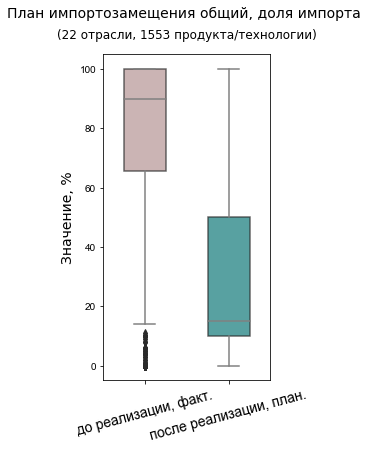

In [68]:
fig=plt.figure(figsize=(3,6))
#custom_palette = sns.diverging_palette(15, 215, n=2)
custom_palette=['rosybrown', 'darkcyan']

ax=sns.boxplot(x='_Import', y='value', 
                 data=dd,  
                 palette=custom_palette, boxprops=dict(alpha=0.7), width=0.5 
                  )
plt.setp(ax.lines, color="grey")
plt.ylabel(u'Значение, %', fontsize=14)
plt.xlabel('')


plt.suptitle(u'План импортозамещения общий, доля импорта', fontsize=14, y=0.99)
plt.title(u'(22 отрасли, 1553 продукта/технологии)', fontsize=12, y=1.03)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    
plt.xticks(range(2), [u'до реализации, факт.',u'после реализации, план.'], fontsize=14, rotation=15)

plt.savefig('importsubstitution_general.png', dpi=150, bbox_inches = 'tight')


In [153]:
import scipy.stats as ss

def get_wilcoxon_p(df):
    cnt = df.shape[0]
    T, p = ss.wilcoxon(df.import_before, df.import_after)
    df_out = pd.DataFrame(dict(zip(['row_cnt', 'W_T', 'W_p'],[cnt, T , p])), index=[0])
    return df_out

In [157]:
wilcoxon_by_branch = table.set_index(['branch'], inplace=False).groupby(level=0, group_keys=True).apply(get_wilcoxon_p).droplevel(level=1)
print wilcoxon_by_branch.sort_values(by=['W_p'])

                                      W_T           W_p  row_cnt
branch                                                          
Фармацевтич.промышл.                  0.0  1.762421e-76      602
Судостроительная промышленность       0.0  1.998570e-19      107
Химическая промышленность             0.0  3.578551e-19      106
Медицинская промышленность            0.0  8.480894e-19      111
Тяжелое машиностр.                    0.0  7.544726e-18       98
Автомобильн.промышл.                  0.0  2.738906e-15       78
Радиоэлектронная промышленность       0.0  1.037741e-11       61
Сельскохоз. и лесное машиностр.       1.0  5.319943e-11       57
Нефтегазовое машиностроение           0.0  9.970869e-11       55
Энергетическое машиностр.**           0.0  9.767295e-10       49
Цветная металлургия                   0.0  1.580105e-09       48
Станкоинструментальная промышл.       0.0  3.629644e-07       34
Транспортн.машиностр.                 0.0  5.408397e-06       26
Легкая промышленность    

In [224]:
median_table=table.groupby('branch')['import_before', 'import_after'].median()
median_table['Subtract']=median_table['import_before']-median_table['import_after']
median_table.sort_values(by=['Subtract'])

,import_before,import_after,Subtract
branch,,,
Детские товары,75.0,64.0,11.0
Станкоинструментальная промышл.,95.0,74.0,21.0
Энергетическое машиностр.**,80.0,50.0,30.0
Нефтегазовое машиностроение,80.0,50.0,30.0
Черная металлургия,47.0,15.0,32.0
Промышленность обычных вооруж.,72.5,35.0,37.5
Легкая промышленность,90.0,50.0,40.0
Цветная металлургия,60.0,20.0,40.0
Лесопромышл.комплекс,92.5,50.0,42.5
